- Erik Pacheco            - 02211012
- Enzo Godoy              - 02211013
- Giovana Rodrigues       - 02211023
- Lucas Mesquita de Souza - 02211044

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Exercício 1

In [46]:
# Carregar os dados do arquivo stars_class.csv
stars_data = pd.read_csv('./stars_class.csv', delimiter=';', index_col=0)

In [47]:
stars_data

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,redshift,plate,MJD,fiber_ID
class,,,,,,,,,,,,,,
GALAXY,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,0.634794,5812,56354,171
GALAXY,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,0.779136,10445,58158,427
GALAXY,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,0.644195,4576,55592,299
GALAXY,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,0.932346,9149,58039,775
GALAXY,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QSO,156.998292,57.703999,25.13461,23.40632,22.71020,21.40669,19.82787,2987,5,55,1.163464,8189,57448,281
GALAXY,148.558953,48.479193,19.63125,17.98072,17.12994,16.73799,16.45069,2821,2,48,0.069587,1005,52703,120
GALAXY,164.279591,52.717208,24.24000,21.92323,20.11684,19.29541,18.89802,2821,2,120,0.467762,6706,56385,689


In [48]:
# Calcular a matriz de correlação
correlation_matrix = stars_data.corr()

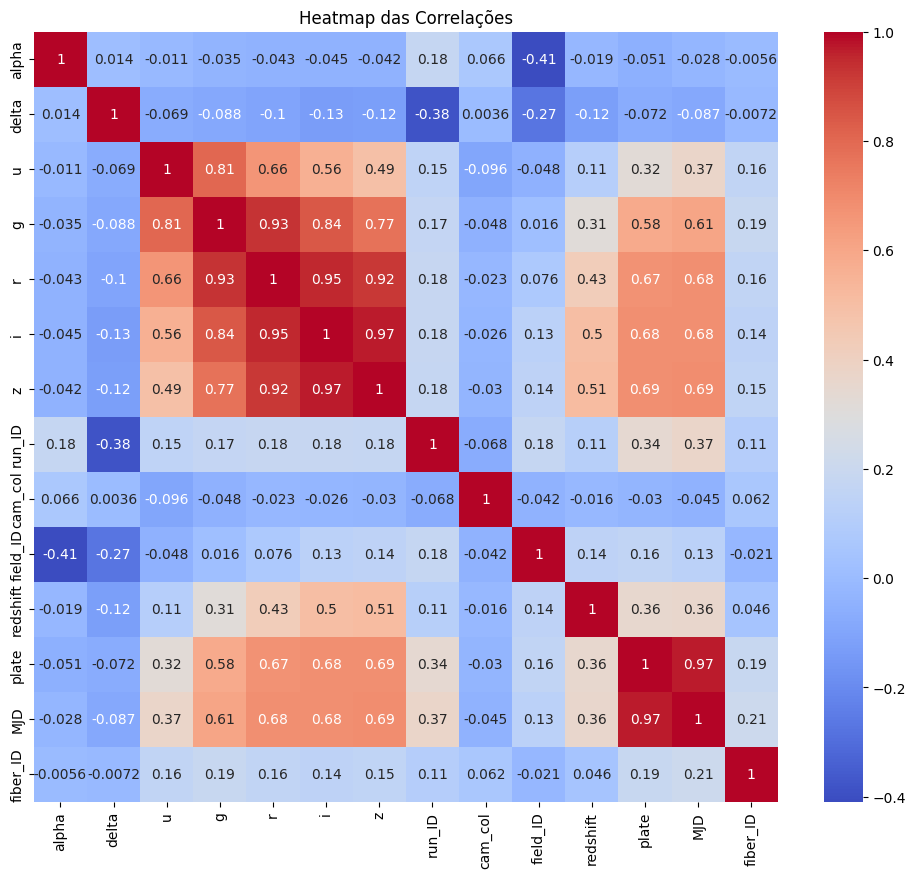

In [49]:
# Plotar o heatmap das correlações
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap das Correlações')
plt.show()

In [50]:
# Padronizar os dados
scaler = StandardScaler()
stars_data_scaled = scaler.fit_transform(stars_data)

In [51]:
# Aplicar PCA
pca = PCA()
pca.fit(stars_data_scaled)

PCA()

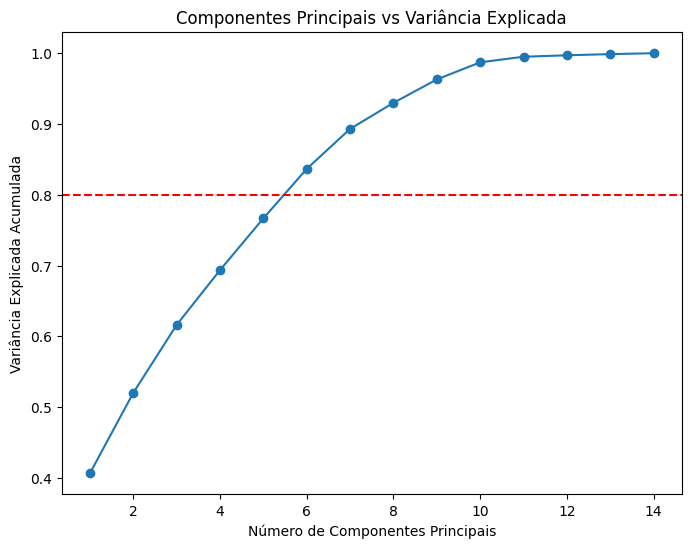

In [52]:
# Plotar a variância explicada acumulada
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.axhline(y=0.80, color='r', linestyle='--')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Componentes Principais vs Variância Explicada')
plt.show()

In [53]:
# Determinar o número de componentes necessários para explicar 80% da variabilidade
n_components = 6
print(f'Número de componentes principais para explicar 80% da variabilidade: {n_components}')

Número de componentes principais para explicar 80% da variabilidade: 6


### Exercício 2

In [54]:
# Carregar os dados do arquivo bread_basket.csv
bread_data = pd.read_csv('./bread_basket.csv', index_col=0)

In [55]:
# Verificar as colunas categóricas
categorical_columns = bread_data.select_dtypes(include=['object']).columns
print(f'Colunas categóricas: {categorical_columns}')

# Aplicar codificação ordinal nas colunas categóricas
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    bread_data[column] = le.fit_transform(bread_data[column])
    label_encoders[column] = le

# Verificar as primeiras linhas dos dados transformados
bread_data.head()

Colunas categóricas: Index(['Item', 'date_time', 'period_day', 'weekday_weekend'], dtype='object')


,Item,date_time,period_day,weekday_weekend
Transaction,,,,
1,11,8741,2,1
2,74,8742,2,1
2,74,8742,2,1
3,48,8743,2,1
3,49,8743,2,1


In [56]:
# Agrupamento com K-means
silhouette_scores = []
K_range = range(2, 11)  # Avaliar de 2 a 10 grupos

In [57]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(bread_data)
    score = silhouette_score(bread_data, clusters)
    silhouette_scores.append(score)

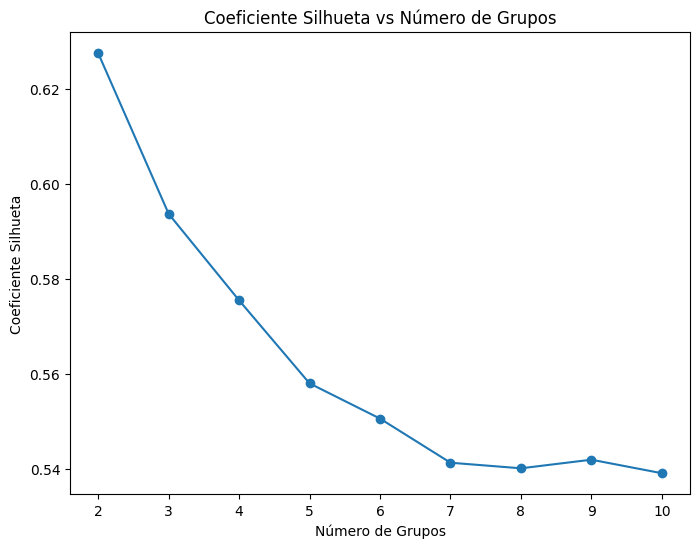

In [60]:
# Plotar os coeficientes de silhueta para diferentes valores de k
plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Número de Grupos')
plt.ylabel('Coeficiente Silhueta')
plt.title('Coeficiente Silhueta vs Número de Grupos')
plt.show()

In [61]:
# Determinar a quantidade ideal de grupos
ideal_k = K_range[np.argmax(silhouette_scores)]
print(f'Quantidade ideal de grupos: {ideal_k}')

Quantidade ideal de grupos: 2
